In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
mnist_train = pd.read_csv("C:/Users/srish/Documents/python_dwdm/mnist_train.csv")

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...        0      0   
1      0    0    0    0    0    0    0    0    0    0  ...        0      0   
2      4    0    0    0    0    0    0    0    0    0  ...        0      0   
3      1    0    0    0    0    0    0    0    0    0  ...        0      0   
4      9    0    0    0    0    0    0    0    0    0  ...        0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


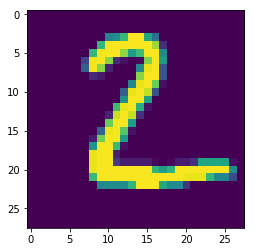

In [25]:
#head 
print(mnist_train.head())
first_image = mnist_test.iloc[1,1:].values
pixels = first_image.reshape((28, 28))
pt.imshow(pixels)


In [10]:
model_dt= DecisionTreeClassifier()
xtrain=mnist_train.iloc[:,1:]
train_label=mnist_train.iloc[:,0]
#train_label.head()
xtrain.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
model_dt.fit(xtrain,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [13]:
from sklearn.metrics import accuracy_score
#accuracy_score(xtrain,train_label)

In [4]:
mnist_test= pd.read_csv("C:/Users/srish/Documents/python_dwdm/mnist_test.csv")

In [14]:
actual_test=mnist_test.iloc[:,1:]
label_predict=model_dt.predict(actual_test)

In [18]:
test_label= mnist_test.iloc[:,0:1]
accuracy =  accuracy_score(test_label, label_predict) * 100
print("accuracy")
print(accuracy)


accuracy
87.72999999999999


In [19]:
print(confusion_matrix(test_label,label_predict))

[[ 919    0    6    8    6    9   11    5   11    5]
 [   0 1090   12    4    1    4   10    4    8    2]
 [   9    9  883   28   15   11   13   32   23    9]
 [  10    5   28  863    5   45    5    9   21   19]
 [   6    5   12    4  858    8   16    8   22   43]
 [  15    7    3   41    8  748   22    6   30   12]
 [  18    4   13   10   21   19  839    1   24    9]
 [   2   13   26   15    8    5    1  933    7   18]
 [  11    9   30   36   24   26   16   12  782   28]
 [  12    4   12   20   45   11    5   19   23  858]]


In [29]:
print(classification_report(test_label,label_predict))

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       980
          1       0.96      0.96      0.96      1135
          2       0.86      0.85      0.86      1032
          3       0.82      0.85      0.84      1010
          4       0.87      0.89      0.88       982
          5       0.84      0.83      0.84       892
          6       0.89      0.89      0.89       958
          7       0.91      0.91      0.91      1028
          8       0.83      0.81      0.82       974
          9       0.86      0.85      0.86      1009

avg / total       0.88      0.88      0.88     10000



In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)


In [23]:
model.fit(xtrain,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
random_f_label=model.predict(actual_test)
random_f_accuracy=accuracy_score(test_label,random_f_label)*100
print("accuracy")
print(random_f_accuracy)

accuracy
94.93


In [19]:
print(confusion_matrix(random_f_label,label_predict))

[[ 940    0   11    6    5   11   13    5    9    9]
 [   1 1091    9    9    3    7    6    3   17    4]
 [   5   11  886   53   17   10   16   20   25   14]
 [  13    8   23  854    8   47   11    6   33   22]
 [   5    3    9    8  862   12   14   18   19   55]
 [  15    6    4   49    6  732   27    5   29   17]
 [  11    2    8    9   20   26  834    4   25   12]
 [   3    8   19   17    4    5    6  922   10   16]
 [   9   13   28   26   18   28   13   10  760   27]
 [   4    1    9   20   44   15    6   14   21  837]]


In [20]:
print(classification_report(random_f_label,label_predict))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1009
          1       0.95      0.95      0.95      1150
          2       0.88      0.84      0.86      1057
          3       0.81      0.83      0.82      1025
          4       0.87      0.86      0.87      1005
          5       0.82      0.82      0.82       890
          6       0.88      0.88      0.88       951
          7       0.92      0.91      0.91      1010
          8       0.80      0.82      0.81       932
          9       0.83      0.86      0.84       971

avg / total       0.87      0.87      0.87     10000



In [30]:
from sklearn.naive_bayes import GaussianNB

model_gauss = GaussianNB()

In [31]:
model_gauss.fit(xtrain,train_label)

GaussianNB(priors=None)

In [32]:
gauss_labels=model_gauss.predict(actual_test)
gauss_accuracy=accuracy_score(test_label,gauss_labels)*100
print("accuracy")
print(gauss_accuracy)

accuracy
55.58


In [33]:
print(confusion_matrix(gauss_labels,label_predict))

[[ 844    1   72   51   24   65   20    4   14    6]
 [   2 1053   39   41    6   21   18   16   75    5]
 [   3    6  240    7   11    7    6    3    7    4]
 [  11    4   94  320    9   34    6    9    6    5]
 [   2    0    6    2  157    2    3    9    2    7]
 [   7    0    4    4    7   35   11    2    8    2]
 [  40   12  260   63   68   51  834    9   29   11]
 [   1    2    8   11   11    2    1  271    4    8]
 [  45   41  267  421  216  563   45   37  601   44]
 [  34   13   31  125  494  100   12  661  210  905]]


In [29]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier()

In [30]:
model_nn.fit(xtrain,train_label)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
nn_labels=model_nn.predict(actual_test)
nn_accuracy=accuracy_score(test_label,nn_labels)*100
print("accuracy")
print(nn_accuracy)

accuracy
96.0


In [32]:
print(confusion_matrix(nn_labels,label_predict))

[[ 933    0    8   10    6   11   18    5   13    5]
 [   0 1085   16    6    1    5    8    5   11    2]
 [   9    9  857   27   14    9   13   25   24    8]
 [  11    5   26  850    7   43    6    9   26   17]
 [   5    6   14    5  858    6   15   11   26   48]
 [  15    8    7   54   11  741   25    9   35   15]
 [  15    3   13    8   18   20  834    0   21    9]
 [   1   15   37   19    9    5    2  932    9   18]
 [   6   12   37   31   20   28   15   12  763   32]
 [   7    3   10   19   47   18    2   21   23  849]]


[1]


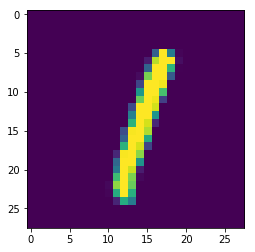

In [35]:
test_label=model_nn.predict(actual_test[5:6])
print(test_label)
first_image = mnist_test.iloc[5,1:].values
pixels = first_image.reshape((28, 28))
pt.imshow(pixels)